## Travelling Salesman in Fruitland

The salesman has just arrived at Fruitland International Airport and has no time to waste. From there, he has to visit each of the 17 cities of Fruitland only once and, at the end of the trip, return to the airport.

In order to reduce the time on the road to a minimum, he needs to optimize his itinerary, which should be as short as possible.

This is a classic single-objective optimization problem that can also be handled by MOSA.

In [1]:
import mosa
from numpy.random import seed,uniform
from math import sqrt
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
seed(0)

The (x,y) coordinates of the 17 cities are generated by the *generate_data* function below.

In [3]:
list_of_cities=["Apple City","Banana City","Strawberry City","BlueBerry City","Pineapple City",
                "Blackberry City","Kiwi City","Cherry City","Star Fruit City","Passion Fruit City","Avocado City",
                "Pomegranate City","Orange City","Lemon City","Tangerine City","Pear City","Tomato City"]

def generate_data():
    maxcoord=20.0
    Cities={"Airport":(0.0,0.0)}
    
    for city in list_of_cities:
        Cities[city]=(uniform(0.0,maxcoord),uniform(0.0,maxcoord))
    
    return Cities

Cities=generate_data()

### Translating the travelling salesman problem into Python code

A Python function *fobj* implements the problem. A solution is taken as its only argument. The solution is a Python dictionary with a single key, "Cities", the same as the population. It contains a list of strings, which corresponds to the names of the cities in Fruitland that the salesman must visit in a specific order.

Since this is a single-objective optimization problem, *fobj* returns a single value, which is the total distance traveled by the salesman if he visits each city in the order they appear in the solution.

As MOSA expects the function where the problem is implemented to return a tuple, the comma after *total_dist* is required.

In [4]:
def fobj(solution):
    coords1=Cities["Airport"]
    coords2=Cities[solution["Cities"][0]]
    total_dist=sqrt((coords2[0]-coords1[0])**2+(coords2[1]-coords1[1])**2)
    
    for i in range(1,len(solution)):
        coords1=Cities[solution["Cities"][i-1]]
        coords2=Cities[solution["Cities"][i]]        
        total_dist+=sqrt((coords2[0]-coords1[0])**2+(coords2[1]-coords1[1])**2)

    coords1=Cities[solution["Cities"][-1]]
    coords2=Cities["Airport"]
    total_dist+=sqrt((coords2[0]-coords1[0])**2+(coords2[1]-coords1[1])**2)
    
    return total_dist,

### Initialization

An *Anneal* object is created. Then attributes of the *opt* object are set to control how the optimization process will take place.

In [5]:
opt=mosa.Anneal()

print("MOSA version: %s" % mosa.__version__)

--------------------------------------------------
    MULTI-OBJECTIVE SIMULATED ANNEALING (MOSA)    
--------------------------------------------------
         Developed by Prof. Roberto Gomes         
   Universidade Federal do ABC (UFABC), Brazil    


MOSA version: 0.4.9


In [6]:
opt.population={"Cities":list_of_cities}
opt.initial_temperature=10.0
opt.number_of_temperatures=100
opt.number_of_iterations=500
opt.archive_size=100
opt.maximum_archive_rejections=10000
opt.number_of_solution_elements={"Cities":len(list_of_cities)}
opt.no_repeated_elements={"Cities":True}
opt.change_value_move={"Cities":0.0}
opt.swap_move={"Cities":1.0}

### Run

The optimization process actually occurs when the *evolve* method is called with *fobj* as argument.

In [7]:
start=time()
opt.evolve(fobj)
end=time()
print("   Elapsed time: %f s" % (end-start))

--- BEGIN: Evolving a solution ---

Looking for a solution in the checkpoint file...
No checkpoint file!
Done!
Trying to load the archive from file archive.json...
File archive.json not found! Initializing an empty archive...
Done!
------
Keys in the population/solution dictionaries:
    ['Cities']:
        Number of elements in the solution: 17
        Discrete sample space
        Number of elements in the population: 17
        Elements cannot be repeated in the solution: True
        Selection weight of this key: 1.000000
        Weight of 'swap' trial move: 1.000000
        Solution sorted after trial move: False
------
Initializing with a random solution from scratch...
Done!
------
Starting at temperature: 10.000000
Evolving solutions to the problem, please wait...
Too many attempts to insert a solution in the archive failed!
Stopping at temperature: 1.215767
------

--- THE END ---
   Elapsed time: 3.469104 s


### Output

The shortest route can be seen below and is around 15.26 units of distance. The first city to be visited is Orange City and the last one is Cherry City, which is the closest city to the airport. The optimized route can also be vizualized on a 2D plot.

In [8]:
opt.printx()

===
Solutions:
1) {'Cities': ['Orange City', 'Strawberry City', 'Avocado City', 'Tangerine City', 'Blackberry City', 'Kiwi City', 'Pear City', 'Banana City', 'BlueBerry City', 'Star Fruit City', 'Apple City', 'Lemon City', 'Tomato City', 'Pomegranate City', 'Passion Fruit City', 'Pineapple City', 'Cherry City']}
Values:
1) [15.263532185788886]


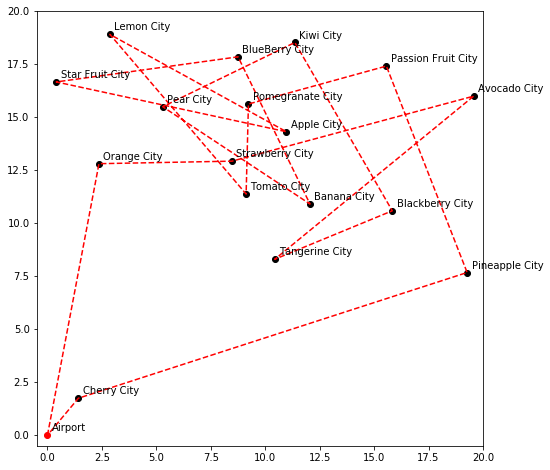

In [9]:
fig,ax=plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.xlim(-0.5,20)
plt.ylim(-0.5,20)
ax.plot(Cities["Airport"][0],Cities["Airport"][1],"ro")
plt.annotate("Airport",(Cities["Airport"][0],Cities["Airport"][1]),(Cities["Airport"][0]+0.2,Cities["Airport"][1]+0.2))

sol=opt.copyx()
pathx=[Cities["Airport"][0]]
pathy=[Cities["Airport"][1]]

for key in sol["Solution"][0]["Cities"]:
    ax.plot(Cities[key][0],Cities[key][1],'ko')
    plt.annotate(key,(Cities[key][0],Cities[key][1]),(Cities[key][0]+0.2,Cities[key][1]+0.2))
    pathx.append(Cities[key][0])
    pathy.append(Cities[key][1])
    
pathx.append(Cities["Airport"][0])
pathy.append(Cities["Airport"][1])

plt.plot(pathx,pathy,"r--")
plt.show()